### Bridging the Gap Between Data Science and Network Security 

As cyber threats become more **sophisticated** and **frequent**, integrating **data science** into **network security** is no longer optional—it’s a necessity. The vast amounts of security data generated daily provide an opportunity to apply **advanced analytics, AI, and machine learning** to detect, prevent, and respond to cyber threats **in real time**.  

### How Can We Bridge the Gap?  
🔹 **Predictive Threat Intelligence** – Machine learning models can analyze historical attack patterns to predict and mitigate future threats.  
🔹 **Automated Anomaly Detection** – AI-driven solutions can detect suspicious activities before they escalate into breaches.  
🔹 **Feature Engineering for Cybersecurity** – Identifying key indicators of compromise (IOCs) through data-driven methods (Oh, 2019).  
🔹 **Real-time Model Performance Monitoring** – Ensuring security models are continuously validated and improved (Steyerberg et al., 2010).  
🔹 **Collaboration Between Data Scientists & Cybersecurity Experts** – Breaking silos by fostering **cross-domain expertise** and shared insights.  

### **Why Is This Crucial in 2025?**  
✅ **Rising Cyber Threats** – With more AI-powered attacks and zero-day vulnerabilities, reactive security is insufficient.  
✅ **Growing IoT & Cloud Adoption** – More connected devices mean an expanded attack surface that requires **data-driven monitoring**.  
✅ **Regulatory Compliance** – Industries must comply with **increasingly strict cybersecurity regulations**, requiring advanced security analytics.  
✅ **Cost Efficiency & Risk Reduction** – AI-driven security measures reduce operational costs while improving **incident response times**.  

By merging **data science and cybersecurity**, businesses can stay ahead of attackers, protect sensitive data, and build a **proactive security framework** for the digital future.  

🚀 How do you see data science shaping the future of cybersecurity? Let's discuss!  
#CyberSecurity #DataScience #AI #MachineLearning #ThreatIntelligence #NetworkSecurity #PredictiveAnalytics

Model Accuracy: 0.97


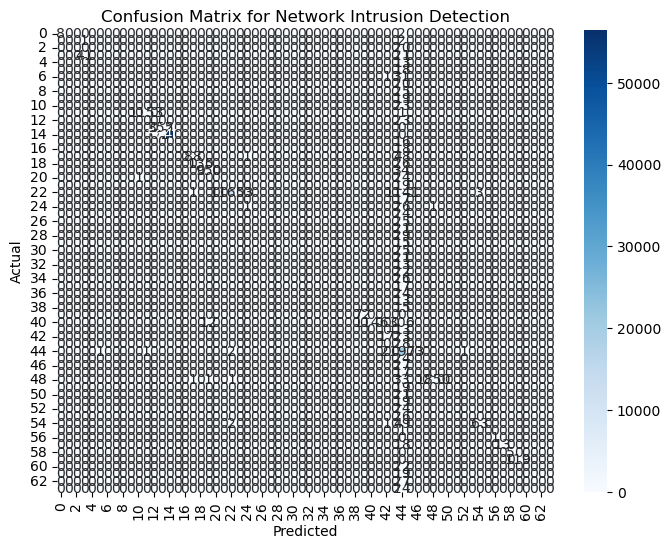

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.manifold import TSNE

# Load dataset (KDDCup99 as an example)
from sklearn.datasets import fetch_kddcup99
data = fetch_kddcup99(as_frame=True)
df = data.frame

# Select relevant features and drop NaN values
df = df.iloc[:, :10].dropna()  

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical features using LabelEncoder
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Define features (X) and target variable (y)
X = df.drop('service', axis=1)  
y = encoder.fit_transform(df['service'])  

# Standardize numeric data for better model performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Network Intrusion Detection")
plt.show()


## 🔐 Bridging the Gap Between Data Science & Cybersecurity: Why It’s Crucial in 2025 🚀

The growing complexity of cyber threats demands AI-driven, data-centric solutions for proactive security measures rather than reactive fixes. Data Science and Cybersecurity must work hand in hand to tackle modern-day threats like intrusions, fraud, and network anomalies.

How Can We Bridge the Gap?
✅ Anomaly Detection in Network Traffic – AI models like Isolation Forest help detect unusual patterns in real-time, flagging potential intrusions before they cause damage.

✅ Predictive Threat Modeling – Machine learning algorithms analyze historical attack patterns to predict and prevent future cyber threats.

✅ Automated Cyber Defense – AI-powered models help security teams reduce response time and minimize false positives in security alerts.

📌 Real-World Example: Using AI for Network Security
Imagine a large enterprise network receiving thousands of requests per second. Traditional monitoring struggles to keep up. Using Python, we can detect anomalies in real-time:

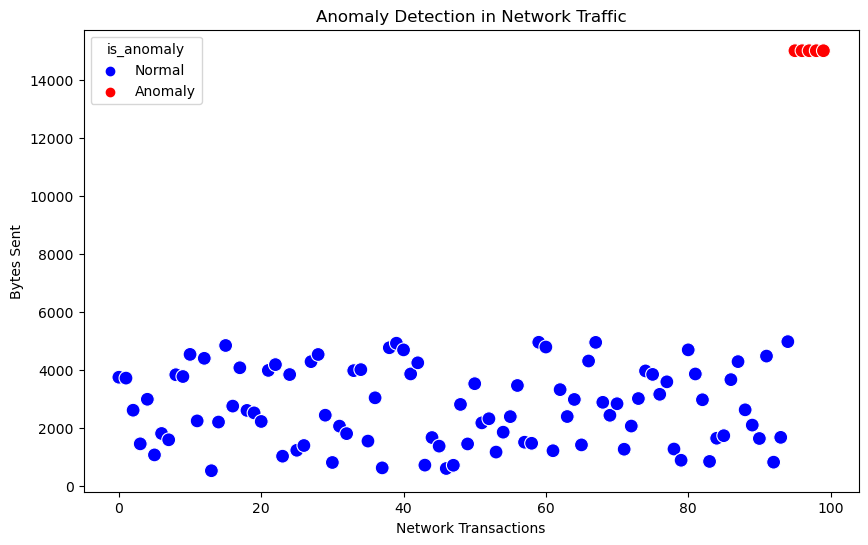

Detected Anomalies:
    bytes_sent  bytes_received  packets_sent  packets_received  anomaly_score  \
95       15000            5000           150                45             -1   
96       15000            5000            45                46             -1   
97       15000            5000           102                56             -1   
98       15000            5000           236                25             -1   
99       15000            5000           166               121             -1   

   is_anomaly  
95    Anomaly  
96    Anomaly  
97    Anomaly  
98    Anomaly  
99    Anomaly  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load sample network traffic dataset
data = {
    'bytes_sent': np.random.randint(500, 5000, 100),
    'bytes_received': np.random.randint(100, 2000, 100),
    'packets_sent': np.random.randint(10, 300, 100),
    'packets_received': np.random.randint(5, 150, 100)
}
df = pd.DataFrame(data)

# Introduce anomalies (simulating a cyberattack)
df.loc[95:99, ['bytes_sent', 'bytes_received']] = [15000, 5000]  # Unusual high values

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Train Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_score'] = model.fit_predict(df_scaled)

# Identify anomalies
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['bytes_sent'], hue=df['is_anomaly'], palette={'Normal': 'blue', 'Anomaly': 'red'}, s=100)
plt.xlabel("Network Transactions")
plt.ylabel("Bytes Sent")
plt.title("Anomaly Detection in Network Traffic")
plt.show()

# Print flagged anomalies
print("Detected Anomalies:")
print(df[df['is_anomaly'] == 'Anomaly'])
